Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Below, please fill in your name and collaborators:

In [581]:
NAME = "ASHLEY BIRKIN"
COLLABORATORS = ""

# Assignment 3 - Time Series Analysis
**(15 points total)**

## Assignment tasks:

In this assignment you will conduct time series analysis of the financial data.

1. Setup your environment to access and download latest stock data. Please see instructions below for different tools you can use to get the data. You can use any of the options provided, either Quandl or Yahoo Finance. If you know of any other service to download the data, please use that service, provide an explanation in the comments.

2. *(2 points)* Download the **adjusted** close prices for FB, MMM, IBM and AMZN for the last 60 months. If you run into any issues downloading the data from online sources, you can use `.csv` files provided. This will not affect your grade for the assignment.

3. *(3 points)* Resample the data to get prices for the end of the **business** month. Select the **Adjusted Close** for each stock.

4. *(3 points)* Use the pandas `autocorrelation_plot()` function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.
    - Are they autocorrelated?
    - Provide short explanation.

5. *(4 points)*
    - Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using `shift()` function.
    - Use pandas `autotocorrelation_plot()` to plot the autocorrelation of the monthly returns.
    - Are the returns autocorrelated? Provide short explanation.

6. *(3 points)*
    - Combine all 4 time series (returns) into a single DataFrame,
    - Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use `scatter_matrix()` function from `pandas.plotting`).
    - Explain the results. Is there any correlation?

**NOTES:**
1. In this assignment, please make sure the DataFrame(s) do not contain any NAs before you plot autocorrelations or scatter matrix.
2. Both options explained below use `pandas-datareader` package for remote data access. To install it, type the following in a command window: `conda install pandas-datareader`. You will also need to install one or more of the following packages `fix_yahoo_finance`, `quandl`. See below.

---------

## Downloading Stock Prices

### Option 1 - Using QUANDL

To use QUANDL service, you need to create an account and get an API Key. Here is the short description of steps:

- Go to https://www.quandl.com/
- Click either `sign up` at the top right corner of the home page, or scroll all the way down and click `Create Free Account` button at the bottom of the page.
- Create an account.
- You will receive an email to the email address you have used during the registration. Confirm your email.

You are all set.

Now, as you login into your account, click the avatar icon at the top right corner of the page, select `"Account Settings."`
On the next page, you will see `Your API Key` field with a long string of numbers and characters underneath. You need this API key for your call to Quandl from the notebook. In the code below, replace `YOUR_API_KEY` with the actual API key from your account.

**NOTE**: You can remove this key before submitting the assignment.

In [582]:
# all imports and env variables
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import datetime
import pandas_datareader.data as web
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt



## DATA IMPORT

In [583]:
# AMAZON

amzn_df = pd.read_csv("amzn_2012-7-31_2017-6-30.csv", usecols=["Date", "AdjClose"])
amzn_df["IndexDate"] = pd.to_datetime(amzn_df["Date"])
amzn_df.set_index("IndexDate", inplace=True)

# IBM

ibm_df = pd.read_csv("ibm_2012-7-31_2017-6-30.csv", usecols=["Date", "AdjClose"])
ibm_df["IndexDate"] = pd.to_datetime(ibm_df["Date"])
ibm_df.set_index("IndexDate", inplace=True)


# FB

fb_df = pd.read_csv("fb_2012-7-31_2017-6-30.csv", usecols=["Date", "AdjClose"])
fb_df["IndexDate"] = pd.to_datetime(fb_df["Date"])
fb_df.set_index("IndexDate", inplace=True)

# 3M

mmm_df = pd.read_csv("mmm_2012-7-31_2017-6-30.csv", usecols=["Date", "AdjClose"])
mmm_df["IndexDate"] = pd.to_datetime(mmm_df["Date"])
mmm_df.set_index("IndexDate", inplace=True)


## BUSINESS MONTH END RESAMPLE

In [584]:
# AMAZON

mo_amzn_df = amzn_df.resample("BME").last()

# IBM

mo_ibm_df = ibm_df.resample("BME").last()


# FB

mo_fb_df = fb_df.resample("BME").last()

# 3M

mo_mmm_df = mmm_df.resample("BME").last()


## AMAZON AUTOCORRELATION CHART

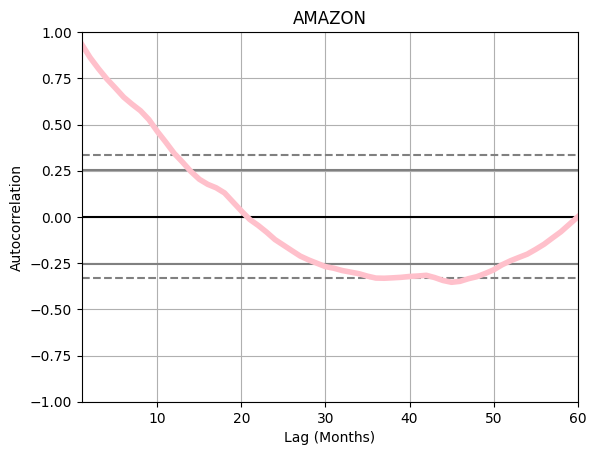

In [585]:
mo_amzn_df["Date"].astype(str)
autocorrelation_plot(mo_amzn_df["AdjClose"], color="pink", linewidth=4)
plt.title("AMAZON")
plt.xlabel("Lag (Months)")
plt.show()

## IBM AUTOCORRELATION CHART

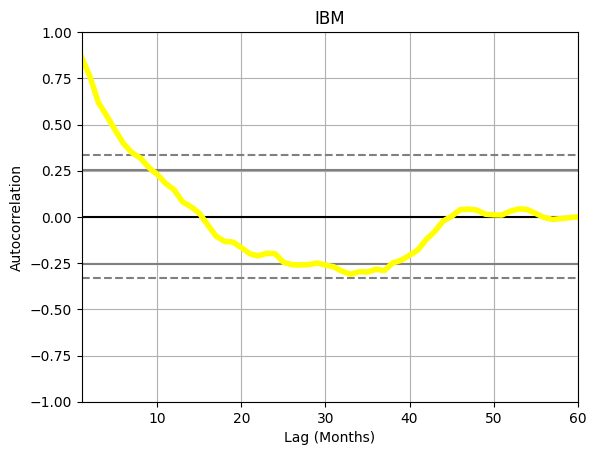

In [586]:
mo_ibm_df["Date"].astype(str)
autocorrelation_plot(mo_ibm_df["AdjClose"], color="yellow", linewidth=4)
plt.title("IBM")
plt.xlabel("Lag (Months)")
plt.show()

## FB AUTOCORRELATION CHART

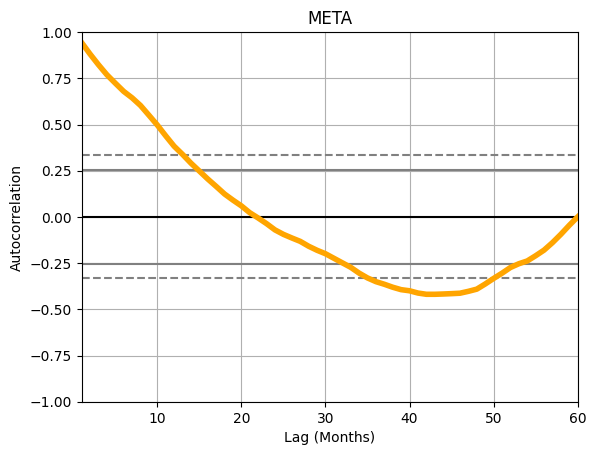

In [587]:
mo_fb_df["Date"].astype(str)
autocorrelation_plot(mo_fb_df["AdjClose"], color="orange", linewidth=4)
plt.title("META")
plt.xlabel("Lag (Months)")
plt.show()

## 3M AUTOCORRELATION CHART

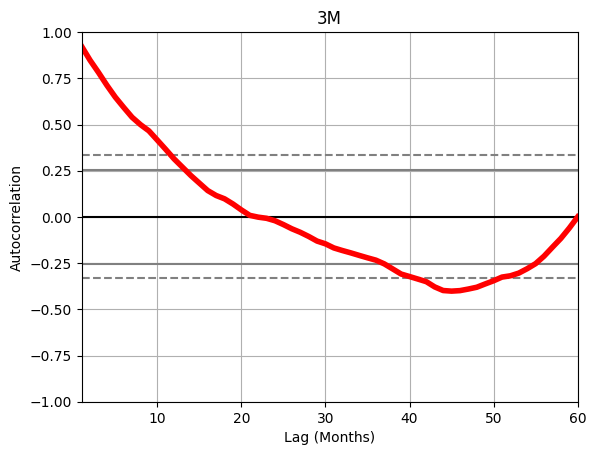

In [588]:
mo_mmm_df["Date"].astype(str)
autocorrelation_plot(mo_mmm_df["AdjClose"], color="red", linewidth=4)
plt.title("3M")
plt.xlabel("Lag (Months)")
plt.show()

## CORRELATION EXPLANATION

## MONTHLY RETURNS

In [589]:
# AMAZON

mo_amzn_df["Return"] = mo_amzn_df["AdjClose"].pct_change()

# IBM

mo_ibm_df["Return"] = mo_ibm_df["AdjClose"].pct_change()

# FB

mo_fb_df["Return"] = mo_fb_df["AdjClose"].pct_change()

# 3M

mo_mmm_df["Return"] = mo_mmm_df["AdjClose"].pct_change()
print(mo_mmm_df)

                  Date    AdjClose    Return
IndexDate                                   
2012-07-31  2012-07-31   80.117221       NaN
2012-08-31  2012-08-31   81.838026  0.021479
2012-09-28  2012-09-28   81.678945 -0.001944
2012-10-31  2012-10-31   77.419126 -0.052153
2012-11-30  2012-11-30   80.912524  0.045123
2012-12-31  2012-12-31   82.602835  0.020891
2013-01-31  2013-01-31   89.453043  0.082929
2013-02-28  2013-02-28   93.093473  0.040697
2013-03-29  2013-03-28   95.161222  0.022212
2013-04-30  2013-04-30   93.729015 -0.015050
2013-05-31  2013-05-31   99.271674  0.059135
2013-06-28  2013-06-28   98.443435 -0.008343
2013-07-31  2013-07-31  105.717536  0.073891
2013-08-30  2013-08-30  102.824007 -0.027370
2013-09-30  2013-09-30  108.101907  0.051329
2013-10-31  2013-10-31  113.932041  0.053932
2013-11-29  2013-11-29  121.460776  0.066081
2013-12-31  2013-12-31  127.592494  0.050483
2014-01-31  2014-01-31  116.620904 -0.085989
2014-02-28  2014-02-28  123.374090  0.057907
2014-03-31

## AMAZON RETURN AUTOCORRELATION CHART

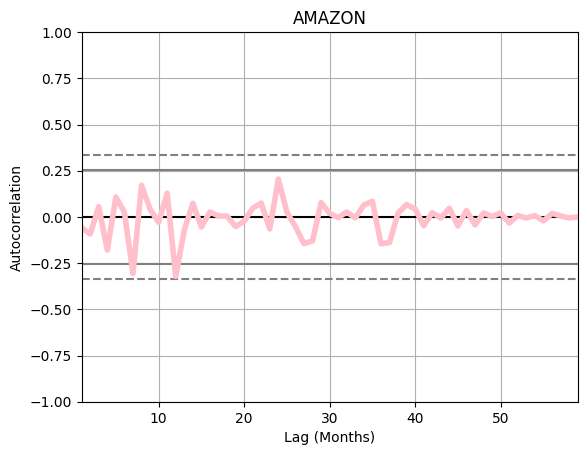

In [590]:
autocorrelation_plot(mo_amzn_df["Return"].dropna(), color="pink", linewidth=4)
plt.title("AMAZON")
plt.xlabel("Lag (Months)")
plt.show()

## IBM RETURN AUTOCORRELATION CHART

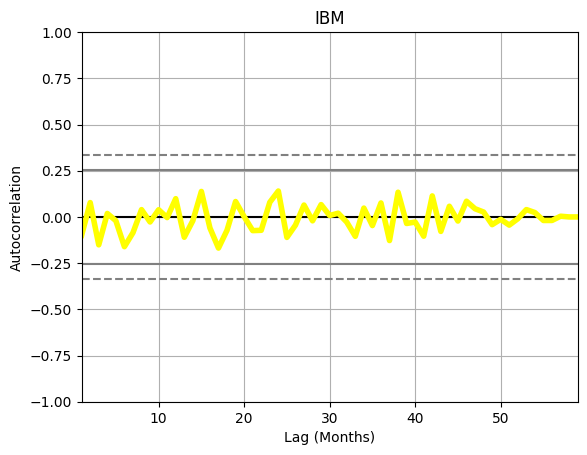

In [591]:
autocorrelation_plot(mo_ibm_df["Return"].dropna(), color="yellow", linewidth=4)
plt.title("IBM")
plt.xlabel("Lag (Months)")
plt.show()

## FB RETURN AUTOCORRELATION CHART

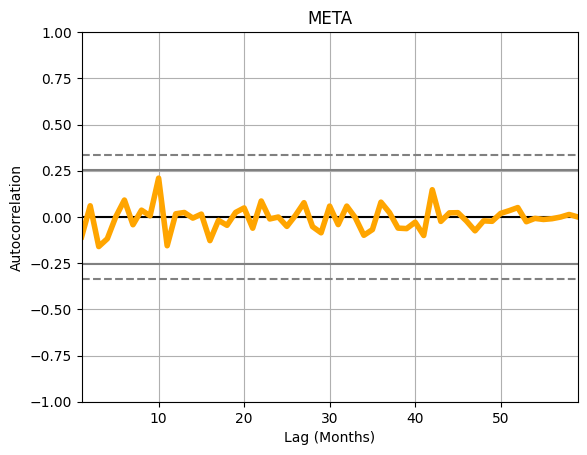

In [592]:
autocorrelation_plot(mo_fb_df["Return"].dropna(), color="orange", linewidth=4)
plt.title("META")
plt.xlabel("Lag (Months)")
plt.show()

## 3M RETURN AUTOCORRELATION CHART

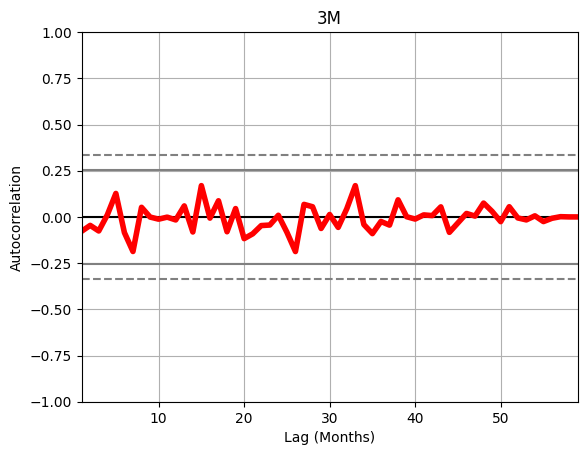

In [593]:

autocorrelation_plot(mo_mmm_df["Return"].dropna(), color="red", linewidth=4)
plt.title("3M")
plt.xlabel("Lag (Months)")
plt.show()

## CORRELATION EXPLANATION

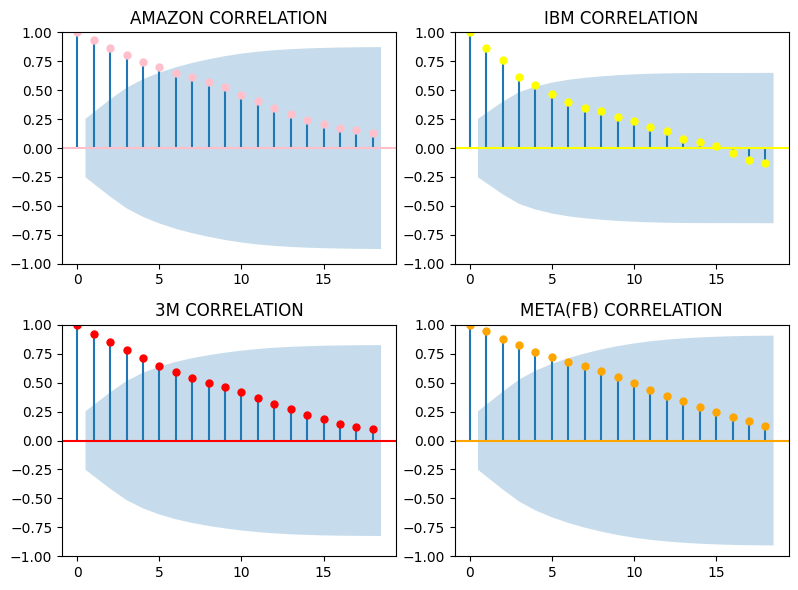

In [594]:
from statsmodels.graphics.tsaplots import plot_acf


fig, axes = plt.subplots(2,2, figsize =(8, 6))
plot_acf(mo_amzn_df['AdjClose'], ax=axes[0,0], title="AMAZON CORRELATION", c="pink")
plot_acf(mo_ibm_df['AdjClose'], ax=axes[0,1], title="IBM CORRELATION", c="yellow")
plot_acf(mo_mmm_df['AdjClose'], ax=axes[1,0], title="3M CORRELATION", c="red")
plot_acf(mo_fb_df['AdjClose'], ax=axes[1,1], title="META(FB) CORRELATION", c="orange")

plt.tight_layout()
plt.show()

According to the plots above, all of our stocks are showing significant a significant positive correlation

> Add blockquote



## DATAFRAME COMBINATION

In [595]:
returns_df = pd.concat([mo_mmm_df["Return"], mo_amzn_df["Return"], mo_ibm_df["Return"], mo_fb_df["Return"]], axis = 1)
returns_df.columns = ["3M", "AMAZON", "IBM", "META"]
returns_df

,3M,AMAZON,IBM,META
IndexDate,,,,
2012-07-31,NaN,NaN,NaN,NaN
2012-08-31,0.021479,0.064166,-0.001520,-0.168217
2012-09-28,-0.001944,0.024369,0.064665,0.199468
2012-10-31,-0.052153,-0.084252,-0.062280,-0.025392
2012-11-30,0.045123,0.082256,-0.018582,0.326386
2012-12-31,0.020891,-0.004682,0.007787,-0.049296
2013-01-31,0.082929,0.058317,0.060141,0.163837
2013-02-28,0.040697,-0.004633,-0.006849,-0.120429
2013-03-29,0.022212,0.008400,0.062092,-0.061284


## SCATTER PLOT

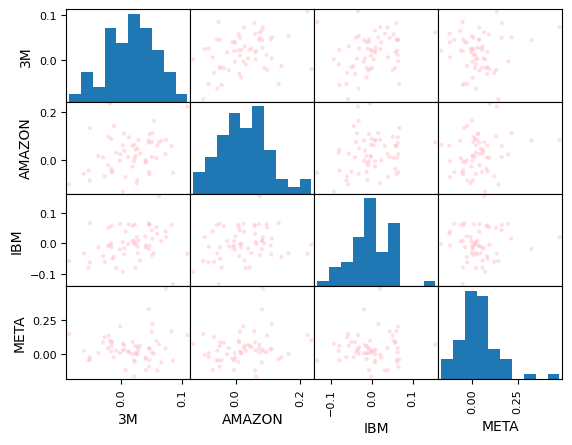

In [596]:
from pandas.plotting import scatter_matrix
from matplotlib import style

pd.plotting.scatter_matrix(returns_df, alpha= 0.5, c="pink", diagonal="hist")
plt.show()

## CORRELATION EXPLAINATION

              3M    AMAZON       IBM      META
3M      1.000000  0.308424  0.260762  0.096255
AMAZON  0.308424  1.000000  0.199674  0.212371
IBM     0.260762  0.199674  1.000000  0.041273
META    0.096255  0.212371  0.041273  1.000000


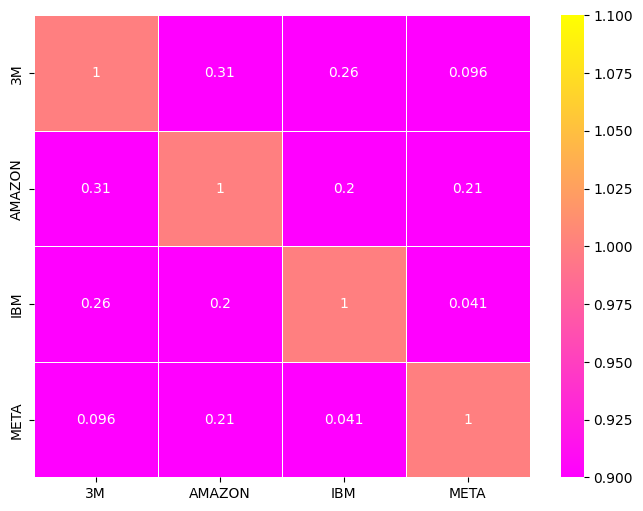

In [597]:
correlation_matrix = returns_df.corr()

print(correlation_matrix)


import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="spring", vmin=1, vmax=1, linewidth=0.5)
plt.show()

According to the plots above, all of our stock returns are showing significant a significant positive correlation - I learned about this heatmap correlation in a helpful youtube video.